**Exercise 1**

  [1] 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1
 [38] 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0
 [75] 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0
samples
 0  1 
49 51 


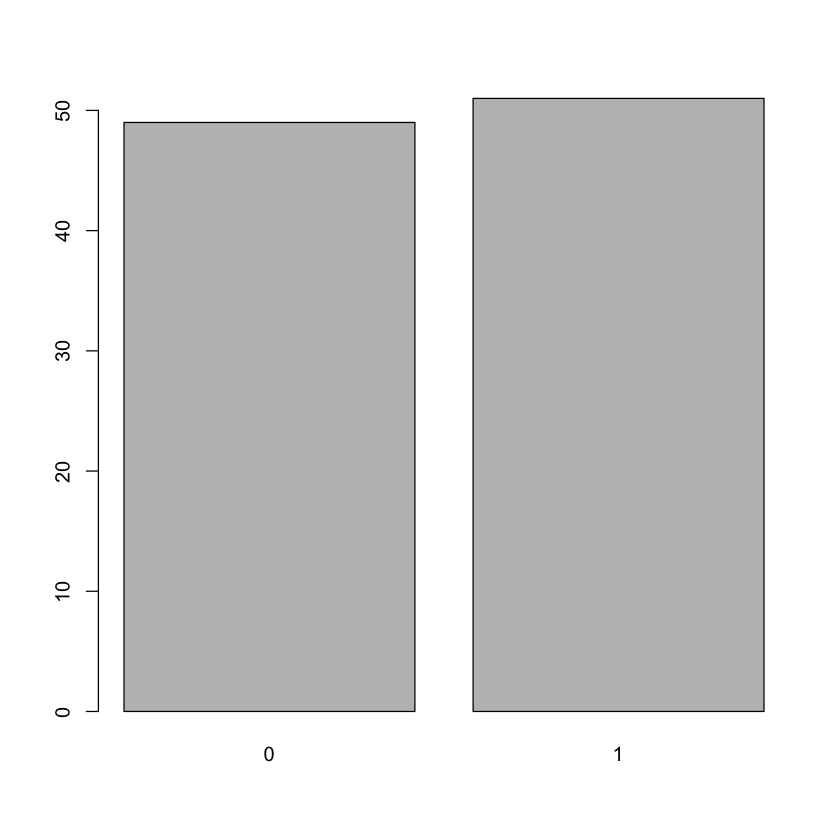

In [12]:
ns = c(10, 100, 1000, 10000)

tosscoin = function(n) {
    table(sample(c(0, 1), size = n, replace = TRUE))
}

res = tosscoin(100)
samples = sample(c(0, 1), size = 100, replace = TRUE)
print(samples)
print(table(samples))
barplot(table(samples))

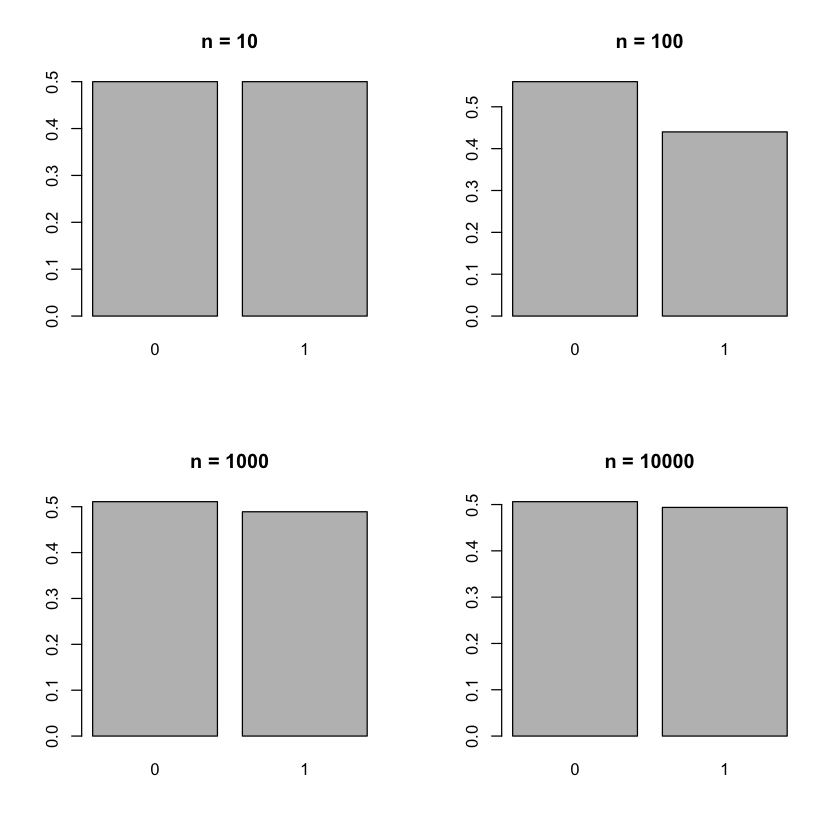

In [6]:
# different n values
ns = c(10, 100, 1000, 10000)

# helper function to return the absolute frequencies of
# Heads (encoded as 0) and Tails (encoded as 1)
#
# @param n: number of trials
# @return Vector of absolute values.
tosscoin = function(n) {
    table(sample(c(0, 1), size = n, replace = TRUE))
}

# for each n toss a coin n times and store head (0) and tail (1)
opar = par(mfrow = c(2, 2))
for (n in ns) {
    res = tosscoin(n)
    barplot(res / sum(res), main = sprintf("n = %i", n))
}
par(opar)

**Exercise 2**

In [2]:
# Implementation of the alpha-trimmed mean
#
# @param x: numeric vector.
# @param alpha: trimming-value between 0 (classic mean) and 0.5
# @param ...: further arguments (kind of variable arguments list)
#   passed down to build-in mean function.
# @return The alpha-trimmed mean value of x.
trimmedMean = function(x, alpha, ...) {
    stopifnot(alpha >= 0 && alpha < 0.5)

    # store the length
    n = length(x)
    # calculate the fraction that needs to be dropped
    frac = floor(alpha * n)
    
    # sort vector in accending order and sub-set only the relevant part
    # I.e., drop the first frac and last frac elements
    x = sort(x)[frac:(n - frac)]

    # for the rest delegate to the build-in function and pass on
    # additional parameter via ... notation
    return(mean(x, ...))
}

# Test
x = c(5, 6, 3, 4, 6, 2, 3, 5, 7, 9)
trimmedMean(x, alpha = 0)
trimmedMean(x, alpha = 0.1)
trimmedMean(x, alpha = 0.2)

# Now let's increase the last value
x[10] = 1000
trimmedMean(x, alpha = 0) # strongly leveraged by the outlier
trimmedMean(x, alpha = 0.1) # robust

[1] 5

[1] 4.555556

[1] 4.571429

[1] 104.1

[1] 4.555556

**Exercise 3**

In [3]:
# Implementation of re-scaling to [0,1]
#
# @param x: numeric vector with values to be scaled.
# @return x with values scaled to the unit-interval.
rescale = function(x) {
    (x - min(x)) / (max(x) - min(x))
}

# test
x = runif(10)
rescale(x)

x = c(5, 6, 3, 4, 6, 2, 3, 5, 7, 9)
rescale(x)

x[10] = 100
rescale(x)

x[10] = NA
rescale(x) # fails :(

# Implementation of re-scaling to [0,1]
# 
# @note: this version can handles NA-values.
#
# @param x: numeric vector with values to be scaled.
# @return x with values scaled to the unit-interval.
rescale = function(x) {
    # logical vector indicating which position are NA
    idx.na = is.na(x)
    
    # calculate bounds
    minval = min(x[!idx.na]) # alternative: minval = min(x, na.rm = TRUE)
    maxval = max(x[!idx.na])
    
    x[!idx.na] = (x[!idx.na] - minval) / (maxval - minval)
    return(x)

}

# test
rescale(x) # works :)

[1] 0.42159081 0.03429977 0.78841882 0.00000000 0.34915515 0.93370415
 [7] 0.90540103 1.00000000 0.38493011 0.07986599

[1] 0.4285714 0.5714286 0.1428571 0.2857143 0.5714286 0.0000000 0.1428571
 [8] 0.4285714 0.7142857 1.0000000

[1] 0.03061224 0.04081633 0.01020408 0.02040816 0.04081633 0.00000000
 [7] 0.01020408 0.03061224 0.05102041 1.00000000

[1] NA NA NA NA NA NA NA NA NA NA

[1] 0.6 0.8 0.2 0.4 0.8 0.0 0.2 0.6 1.0  NA

**Exercise 4**

In [4]:
# Implementation of the cummulative sum
# 
# @param x: numeric vector.
# @return Numeric vector of cummulative sums.
cumsum_loop = function(x) {
    n = length(x)
    cs = numeric(n)
    cs[1] = x[1]
    for (i in 2:length(x)) {
        cs[i] = cs[i - 1] + x[i]
    }
    return(cs)
}

# test
all(replicate(100,
    {
        x = runif(100)
        all.equal(cumsum(x), cumsum_loop(x))
    }))

# Helper function to conduct one run of a method multiple times
# 
# @param fun: function that expects a single numeric vector.
# @param n: length of the input vector.
# @param method: string indicating the used method.
# @param repls: the number of independent runs (to account for stochasticity).
#   Defaults to 10.
# @return Data frame with columns n, repl, runtime and method.
runner = function(fun, n, method, repls = 10) {
    x = runif(n)
    runtime = replicate(repls, unname(system.time({fun(x)})[3L]))
    return(data.frame(n = n, repl = 1:repls, runtime = runtime, method = method))
}

# vector lengths we want to benchmark
ns = c(1e6, 1e7, 1e8)

# run both methods ...
df_runtimes_buildin = do.call(rbind, lapply(ns, function(n) runner(cumsum, n, "buildin")))
df_runtimes_loop = do.call(rbind, lapply(ns, function(n) runner(cumsum_loop, n, "custom")))
# ... and store results in one big data frame
data = rbind(df_runtimes_buildin, df_runtimes_loop)                                    

[1] TRUE

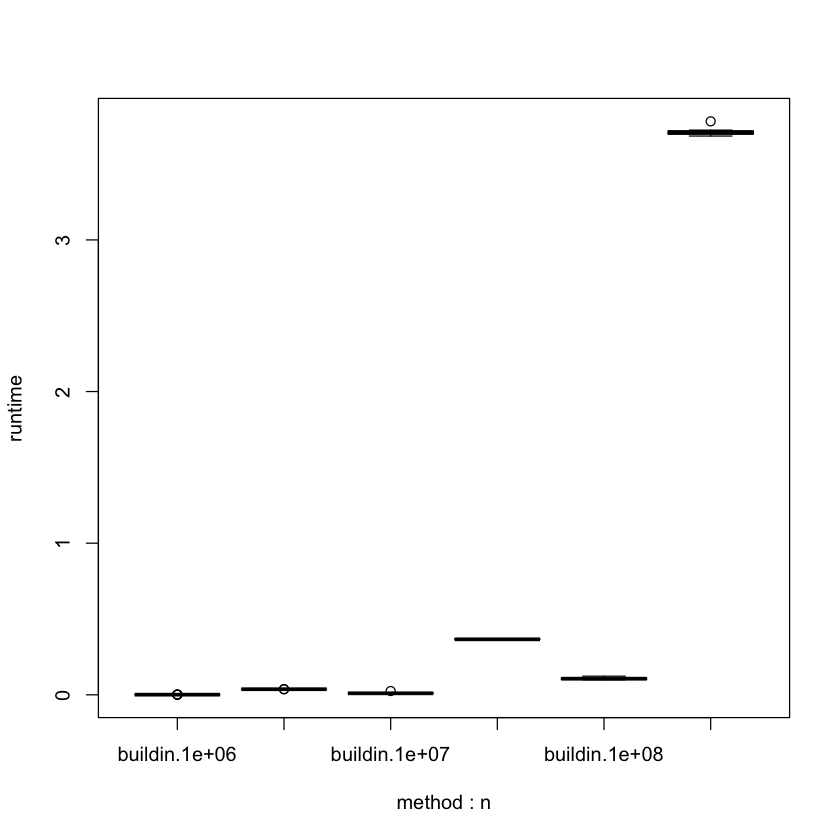

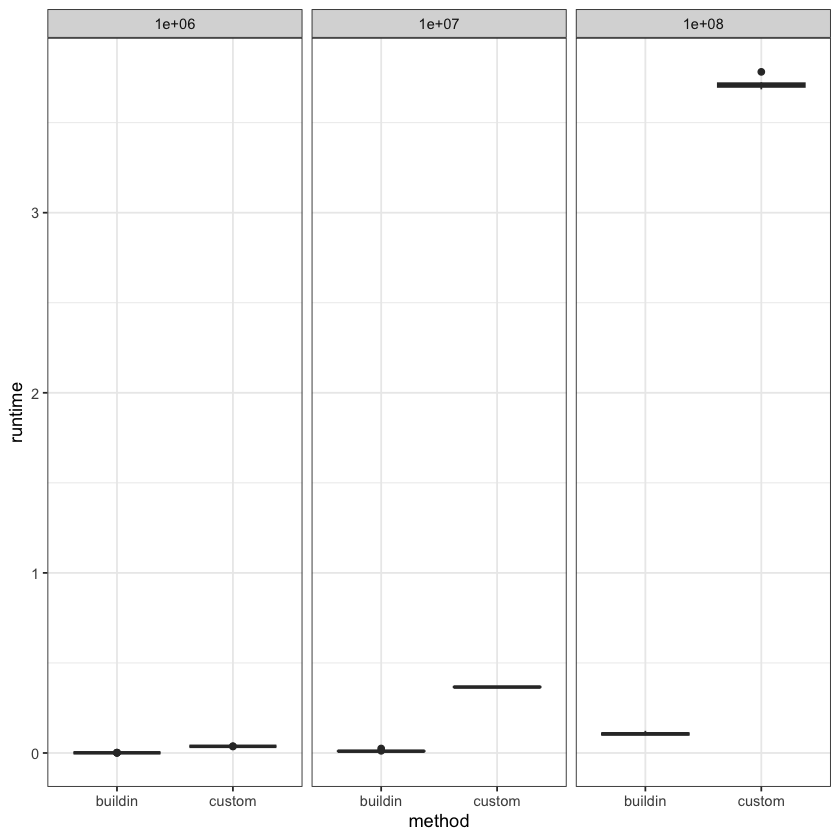

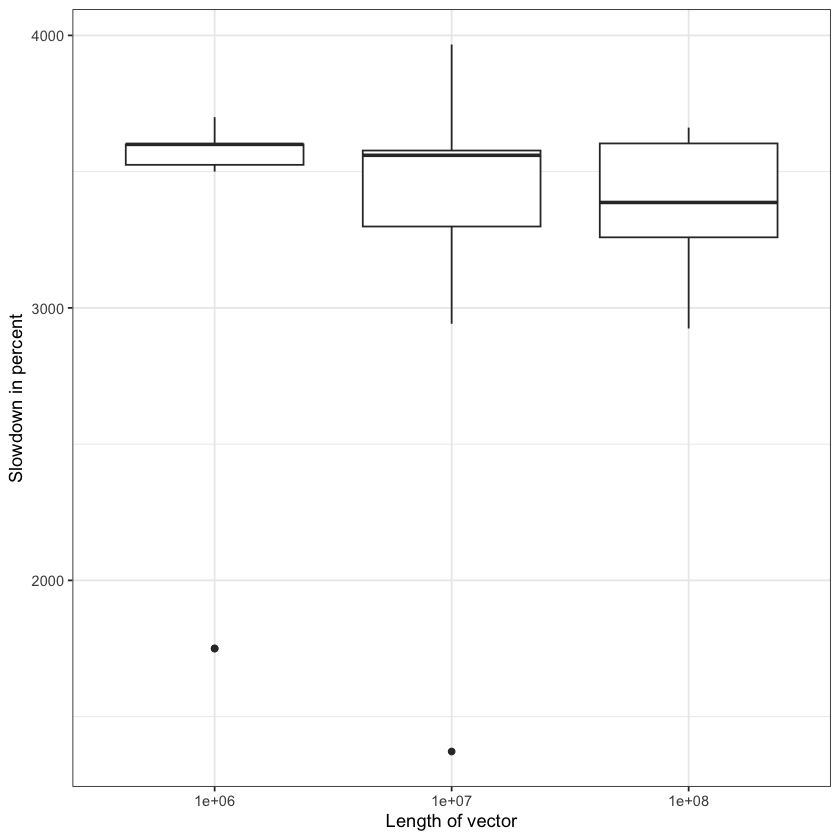

In [5]:
# Now let's do the analysis


# box-plot via base R
boxplot(runtime ~ method + n, data = data)

# box-plot via ggplot2
library(ggplot2)
g = ggplot(data)
g = g + geom_boxplot(aes(x = method, y = runtime))
g = g + facet_grid(. ~ n, scales = "free")
g = g + theme_bw()
g                                        
                                         
                                         
# calculate slow-down of custom implementation
slowdown = df_runtimes_buildin
slowdown$slowdown = ((df_runtimes_loop$runtime / df_runtimes_buildin$runtime) - 1) * 100 # in percent
g = ggplot(slowdown)
g = g + geom_boxplot(aes(x = as.factor(n), y = slowdown))
g = g + theme_bw()
g = g + labs(x = "Length of vector", y = "Slowdown in percent")
g  